<a href="https://colab.research.google.com/github/omkarumale111/DL-Lab/blob/main/Pr7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Cumulative explained variance ratio:
[0.72962445 0.95813207 0.99482129 1.        ]

Number of components to explain 95% variance: 2


/tmp/ipython-input-8882098.py:36: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Species", labels=legend_labels)


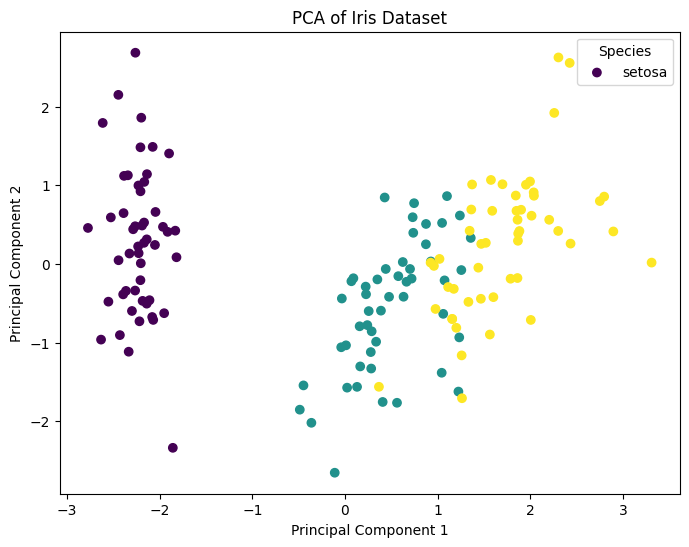

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.head())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(df_scaled)

explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

print(f"Cumulative explained variance ratio:\n{explained_variance_ratio_cumulative}")
print(f"\nNumber of components to explain 95% variance: {n_components_95}")

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")

legend_labels = [iris.target_names[i] for i in range(len(iris.target_names))]
plt.legend(*scatter.legend_elements(), title="Species", labels=legend_labels)

plt.show()